In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustured-df/headlines_clustered.pkl
/kaggle/input/mpnet-cluster/headlines_clustered_mpnet.pkl


In [3]:
df = pd.read_pickle("/kaggle/input/mpnet-cluster/headlines_clustered_mpnet.pkl")
df

,company,headline,description,articleBody,tags,maskedHeadline,GMM Cluster,Agglomerative Cluster
0,Adani Enterprises Ltd.,"CBI books Adani Enterprises, 3 ex-NCCF officia...",The CBI alleged that acts of &amp;quot;omissio...,The CBI has booked Ahmedabad-based Adani Enter...,"Adani Enterprises, Business, CBI, India, Marke...","ORGANIZATION books ORGANIZATION, 3 PERSON for ...",5,8
1,Adani Enterprises Ltd.,Adani Enterprises denies wrongdoing amid alleg...,The firm was replying to the BSE in response t...,Adani Enterprises on Monday said that it has n...,"Adani Enterprises, Business, CBI, coal supply,...",ORGANIZATION denies wrongdoing amid allegation...,5,8
2,Power Grid Corporation of India Ltd.,Buy Power Grid Corporation of India; target of...,Prabhudas Lilladher is bullish on Power Grid C...,Prabhudas Lilladher's research report on Power...,"Buy, Power Grid Corporation of India, Prabhuda...",Buy ORGANIZATION; target of MONEY: PERSON,0,15
3,Adani Enterprises Ltd.,Adani Enterprises net profit surges to Rs 383 ...,"The company's expenses were Rs 10,635.16 crore...",Adani Enterprises Ltd (AEL) on Wednesday said ...,"Adani Enterprises Ltd, Business, Results",ORGANIZATION net profit surges to MONEY in DATE,3,2
4,Grasim Industries Ltd.,Grasim Industries Q3 net profit down 9.4% to R...,Total income during the quarter under review f...,Aditya Birla Group firm Grasim Industries Ltd ...,"Business, Grasim Industries Ltd., Results",ORGANIZATION Q3 net profit down PERCENTAGE to ...,21,9
...,...,...,...,...,...,...,...,...
2714,Wipro Ltd.,Reduce Wipro; target of Rs 410: ICICI Securities,ICICI Securities is bullish on Wipro has recom...,ICICI Securitie's research report on Wipro Wip...,"ICICI Securities, Recommendations, Reduce, Wipro",Reduce ORGANIZATION; target of MONEY: ORGANIZA...,29,11
2715,HDFC Bank Ltd.,"Buy HDFC Bank; target of Rs 1,850: ICICI Secur...",ICICI Securities is bullish on HDFC Bank has r...,ICICI Securitie's research report on HDFC Bank...,"Buy, HDFC Bank, ICICI Securities, Recommendations",Buy ORGANIZATION; target of MONEY: ORGANIZATION,4,27
2716,Larsen & Toubro Ltd.,L&amp;amp;T manufactures hydrotreating reactor...,The reactor has been dispatched for Mexico fro...,Engineering and construction conglomerate Lars...,"Business, Companies, Larsen & Toubro, Mexico",L&amp;amp;T manufactures PRODUCT for refinery ...,11,25
2717,Hindustan Unilever Ltd.,"Hindustan Unilever Q4 Preview: Price cuts, slo...",The hike in royalty payments to parent Unileve...,Hindustan Unilever (HUL) is expected to report...,"Business, Hindustan Unilever, Result Poll","ORGANIZATION Q4 Preview: EVENT, slow demand, E...",1,9


In [4]:
df = df.drop("Agglomerative Cluster", axis=1)


In [5]:
df

,company,headline,description,articleBody,tags,maskedHeadline,GMM Cluster
0,Adani Enterprises Ltd.,"CBI books Adani Enterprises, 3 ex-NCCF officia...",The CBI alleged that acts of &amp;quot;omissio...,The CBI has booked Ahmedabad-based Adani Enter...,"Adani Enterprises, Business, CBI, India, Marke...","ORGANIZATION books ORGANIZATION, 3 PERSON for ...",5
1,Adani Enterprises Ltd.,Adani Enterprises denies wrongdoing amid alleg...,The firm was replying to the BSE in response t...,Adani Enterprises on Monday said that it has n...,"Adani Enterprises, Business, CBI, coal supply,...",ORGANIZATION denies wrongdoing amid allegation...,5
2,Power Grid Corporation of India Ltd.,Buy Power Grid Corporation of India; target of...,Prabhudas Lilladher is bullish on Power Grid C...,Prabhudas Lilladher's research report on Power...,"Buy, Power Grid Corporation of India, Prabhuda...",Buy ORGANIZATION; target of MONEY: PERSON,0
3,Adani Enterprises Ltd.,Adani Enterprises net profit surges to Rs 383 ...,"The company's expenses were Rs 10,635.16 crore...",Adani Enterprises Ltd (AEL) on Wednesday said ...,"Adani Enterprises Ltd, Business, Results",ORGANIZATION net profit surges to MONEY in DATE,3
4,Grasim Industries Ltd.,Grasim Industries Q3 net profit down 9.4% to R...,Total income during the quarter under review f...,Aditya Birla Group firm Grasim Industries Ltd ...,"Business, Grasim Industries Ltd., Results",ORGANIZATION Q3 net profit down PERCENTAGE to ...,21
...,...,...,...,...,...,...,...
2714,Wipro Ltd.,Reduce Wipro; target of Rs 410: ICICI Securities,ICICI Securities is bullish on Wipro has recom...,ICICI Securitie's research report on Wipro Wip...,"ICICI Securities, Recommendations, Reduce, Wipro",Reduce ORGANIZATION; target of MONEY: ORGANIZA...,29
2715,HDFC Bank Ltd.,"Buy HDFC Bank; target of Rs 1,850: ICICI Secur...",ICICI Securities is bullish on HDFC Bank has r...,ICICI Securitie's research report on HDFC Bank...,"Buy, HDFC Bank, ICICI Securities, Recommendations",Buy ORGANIZATION; target of MONEY: ORGANIZATION,4
2716,Larsen & Toubro Ltd.,L&amp;amp;T manufactures hydrotreating reactor...,The reactor has been dispatched for Mexico fro...,Engineering and construction conglomerate Lars...,"Business, Companies, Larsen & Toubro, Mexico",L&amp;amp;T manufactures PRODUCT for refinery ...,11
2717,Hindustan Unilever Ltd.,"Hindustan Unilever Q4 Preview: Price cuts, slo...",The hike in royalty payments to parent Unileve...,Hindustan Unilever (HUL) is expected to report...,"Business, Hindustan Unilever, Result Poll","ORGANIZATION Q4 Preview: EVENT, slow demand, E...",1


In [6]:
tags = {0: ['Market/Stock Recommendation', 'Market/Stock Target Price'], 1: ['Corporate/Revenue Base', 'Market/Demand'], 2: ['Market/Stock Rating'], 3: ['Financial/Revenue Growth', 'Financial/Revenue Decline', 'Market/Analyst Estimates'], 4: ['Market/Stock Recommendation', 'Market/Stock Target Price'], 5: ['Financial/Revenue', 'Financial/Profitability', 'Corporate/Partnership', 'Corporate/Product Offering'], 6: ['Financial/Pricing', 'Market/Market Share', 'Market/Demand Forecast', 'Corporate/Product Recall'], 7: ['Corporate/Operational Health'], 8: ['Financial/Revenue Growth', 'Market/Operational Efficiency'], 9: ['Market/Stock Rating']}


In [7]:
for key, value in tags.items():
    bleh = value.copy()
    tags[key] = [ele.replace("/", " and ") for ele in bleh]
    print(value)

['Market/Stock Recommendation', 'Market/Stock Target Price']
['Corporate/Revenue Base', 'Market/Demand']
['Market/Stock Rating']
['Financial/Revenue Growth', 'Financial/Revenue Decline', 'Market/Analyst Estimates']
['Market/Stock Recommendation', 'Market/Stock Target Price']
['Financial/Revenue', 'Financial/Profitability', 'Corporate/Partnership', 'Corporate/Product Offering']
['Financial/Pricing', 'Market/Market Share', 'Market/Demand Forecast', 'Corporate/Product Recall']
['Corporate/Operational Health']
['Financial/Revenue Growth', 'Market/Operational Efficiency']
['Market/Stock Rating']


In [8]:
tags

{0: ['Market and Stock Recommendation', 'Market and Stock Target Price'],
 1: ['Corporate and Revenue Base', 'Market and Demand'],
 2: ['Market and Stock Rating'],
 3: ['Financial and Revenue Growth',
  'Financial and Revenue Decline',
  'Market and Analyst Estimates'],
 4: ['Market and Stock Recommendation', 'Market and Stock Target Price'],
 5: ['Financial and Revenue',
  'Financial and Profitability',
  'Corporate and Partnership',
  'Corporate and Product Offering'],
 6: ['Financial and Pricing',
  'Market and Market Share',
  'Market and Demand Forecast',
  'Corporate and Product Recall'],
 7: ['Corporate and Operational Health'],
 8: ['Financial and Revenue Growth', 'Market and Operational Efficiency'],
 9: ['Market and Stock Rating']}

In [9]:
df[df['GMM Cluster'] == 1].head(20)

,company,headline,description,articleBody,tags,maskedHeadline,GMM Cluster
12,Grasim Industries Ltd.,Competition Commission imposes Rs 302cr penalt...,The company has also been directed to &amp;quo...,The Competition Commission has slapped a penal...,"Business, Competition Commission of India, Gra...",ORGANIZATION imposes MONEY penalty on ORGANIZA...,1
155,Britannia Industries Ltd.,Britannia declares interim dividend of Rs 83 p...,The record date for determining the entitlemen...,FMCG major Britannia on Monday said its board ...,"Britannia Industries, Business, Market news",ORGANIZATION declares EVENT of MONEY per share,1
186,Tata Steel Ltd.,"Despite record drop in earnings and GDP in Q1,...",Most of the chief executives of companies expe...,"Bad news from Q1 seems to be pouring in, much ...","Business, Companies",Despite record drop in MONEY and MONEY in DATE...,1
255,Shriram Finance Ltd.,"Expect AUM to remain flat in FY21, post double...",&amp;quot;Overall business has picked up in se...,Shriram Transport Finance Company (STFC) expec...,"Business, Companies","Expect MONEY to remain flat in EVENT, post PER...",1
260,Bharti Airtel Ltd.,Telecom ARPU poised for 'structural uptrend' v...,The note by JM Financial titled `A tale of sup...,Telecom industry Average Revenue Per User (ARP...,"average revenue per user (ARPU), Bharati Airte...",ORGANIZATION MONEY poised for 'structural uptr...,1
308,Reliance Industries Ltd.,"Open to further stimulus, assessing impact of ...",Finance Minister Nirmala Sitharaman also said ...,Finance Minister Nirmala Sitharaman said on ...,"Business, Covid-19, fiscal stimulus, GDP, Indi...","Open to further stimulus, assessing impact of ...",1
323,Bajaj Finance Ltd.,Bajaj Finance Q2 preview: Profit may see doubl...,Pre-provision operating profit growth is likel...,NBFC major Bajaj Finance is expected to report...,"Bajaj Finance, Result Poll",ORGANIZATION EVENT preview: MONEY may see PERC...,1
364,Tech Mahindra Ltd.,Tech Mahindra Q2 preview: PAT may fall but rev...,Centrum Institutional Research expects Tech Ma...,IT player Tech Mahindra will announce its Sept...,"Result Poll, Tech Mahindra",ORGANIZATION Q2 preview: MONEY may fall but MO...,1
450,Shriram Finance Ltd.,Shriram Transport Finance Q2 net profit down 1...,The non-banking lender added that the actual i...,Shriram Transport Finance Co Ltd (STFC) on Thu...,"Business, Results, Shriram Transport Finance C...",ORGANIZATION EVENT MONEY down PERCENTAGE to MONEY,1
451,IndusInd Bank Ltd.,IndusInd Bank Q2 Preview: Profit may fall shar...,Kotak Institutional Equities too expects the b...,Private sector lender IndusInd Bank&nbsp;will ...,"IndusInd Bank, Result Poll",ORGANIZATION EVENT: MONEY may fall sharply ami...,1


In [11]:
pip install sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 5.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Processing clusters:   0%|          | 0/10 [00:00<?, ?it/s]


Cluster 0: Using 35 samples out of 353 (10.0%)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  10%|█         | 1/10 [00:00<00:08,  1.06it/s]


Cluster 1: Using 7 samples out of 71 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  20%|██        | 2/10 [00:01<00:05,  1.57it/s]


Cluster 2: Using 3 samples out of 32 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  30%|███       | 3/10 [00:01<00:03,  1.91it/s]


Cluster 3: Using 7 samples out of 73 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  40%|████      | 4/10 [00:02<00:02,  2.05it/s]


Cluster 4: Using 28 samples out of 289 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  50%|█████     | 5/10 [00:02<00:02,  2.15it/s]


Cluster 5: Using 8 samples out of 81 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  60%|██████    | 6/10 [00:03<00:01,  2.19it/s]


Cluster 6: Using 4 samples out of 47 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  70%|███████   | 7/10 [00:03<00:01,  2.31it/s]


Cluster 7: Using 6 samples out of 60 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  80%|████████  | 8/10 [00:03<00:00,  2.38it/s]


Cluster 8: Using 8 samples out of 84 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters:  90%|█████████ | 9/10 [00:04<00:00,  2.37it/s]


Cluster 9: Using 9 samples out of 92 (10.0%)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing clusters: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


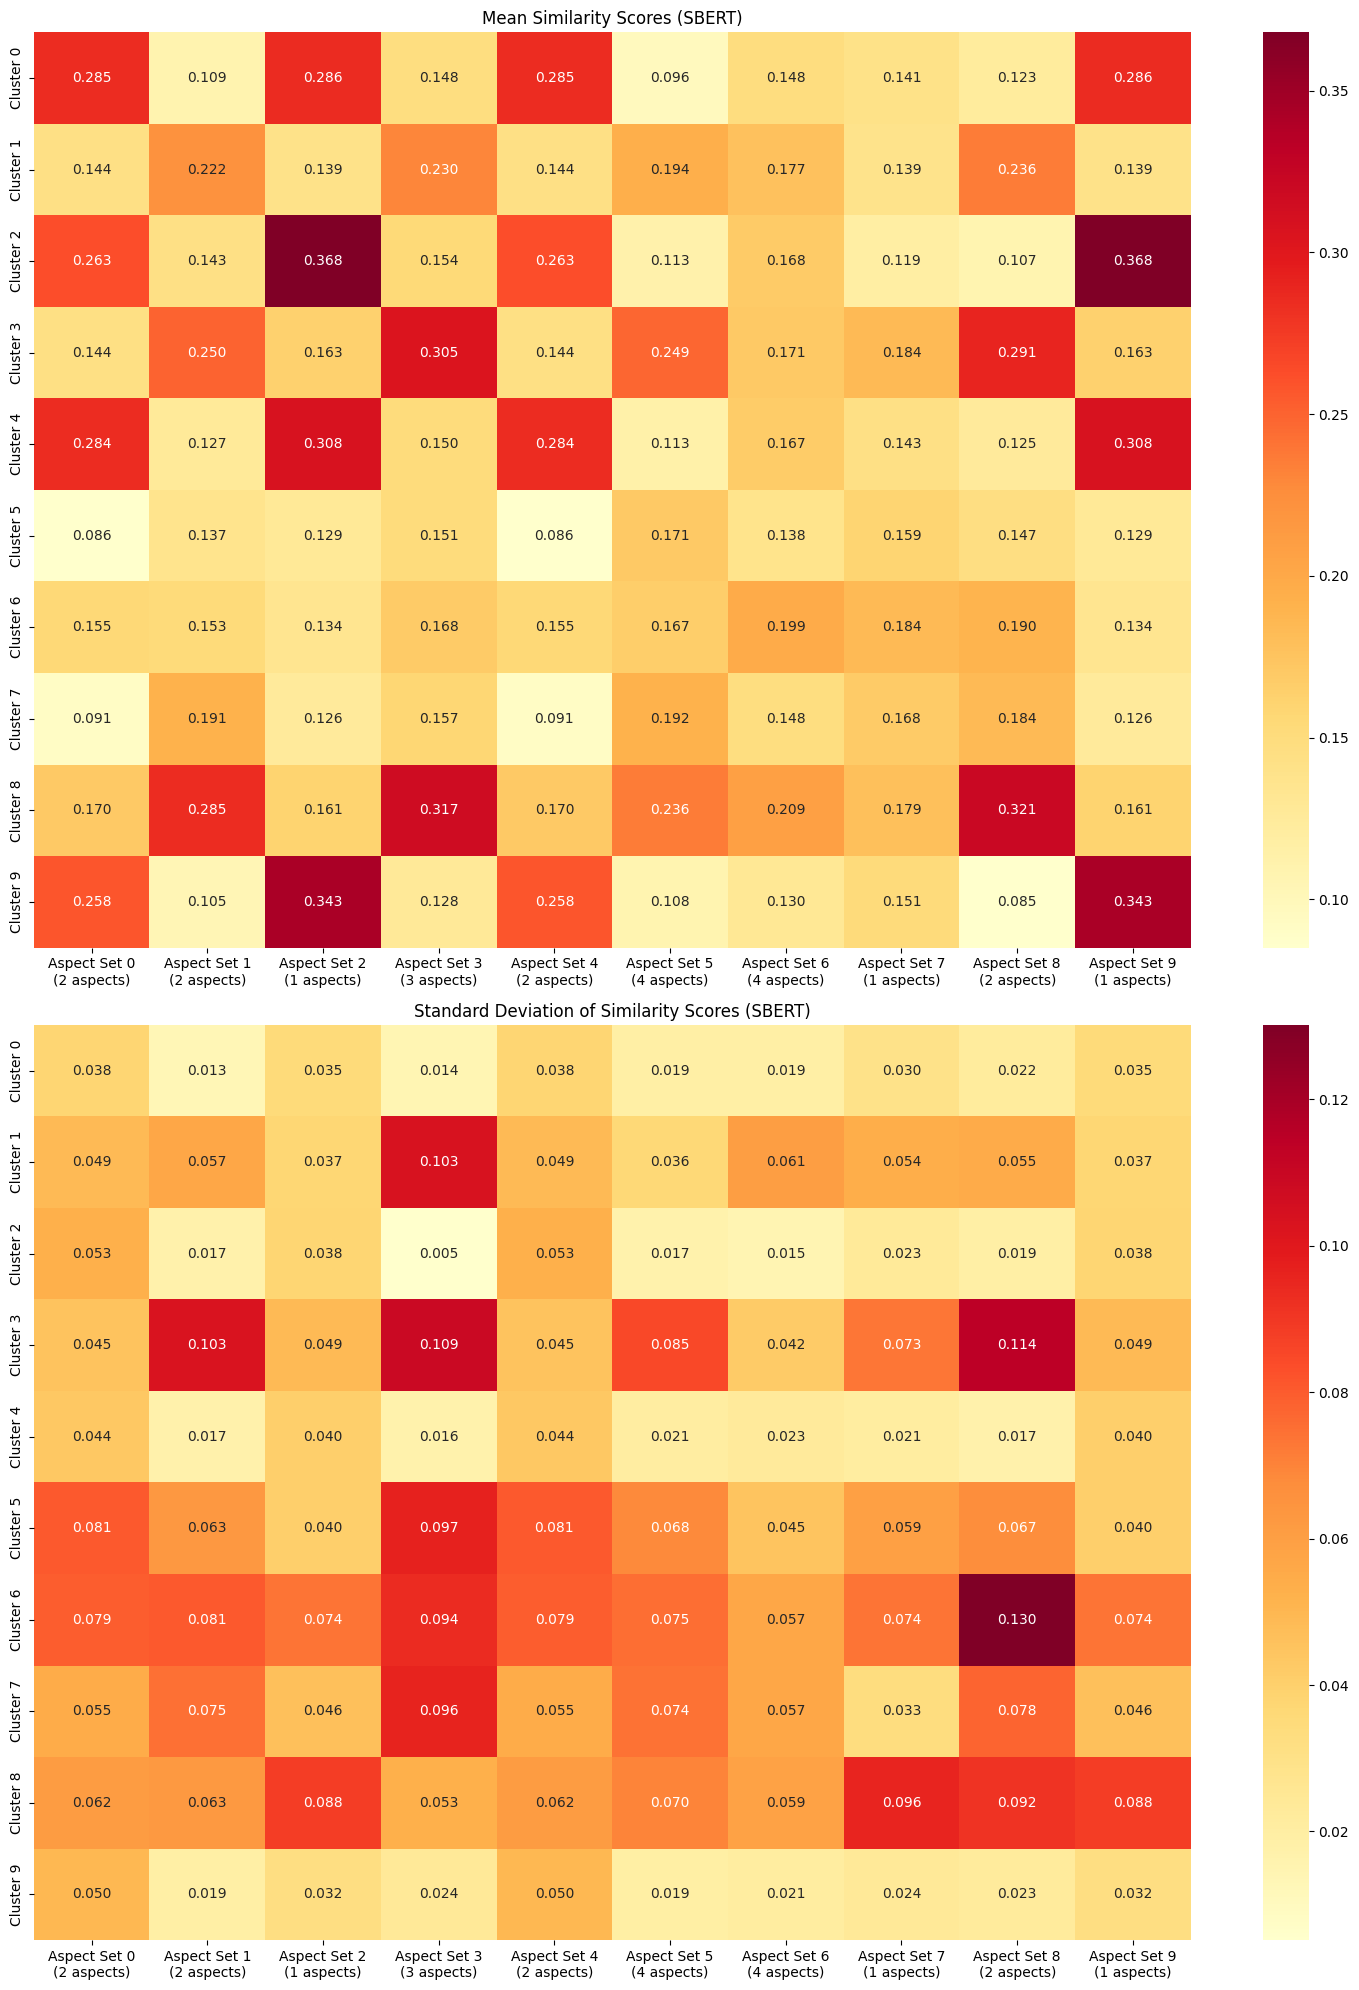


Detailed Statistics:

Cluster 0:
Total size: 353, Sample size: 35
Aspect Set 0 (size: 2)
  Mean similarity: 0.285
  Std deviation: 0.038
Aspect Set 1 (size: 2)
  Mean similarity: 0.109
  Std deviation: 0.013
Aspect Set 2 (size: 1)
  Mean similarity: 0.286
  Std deviation: 0.035
Aspect Set 3 (size: 3)
  Mean similarity: 0.148
  Std deviation: 0.014
Aspect Set 4 (size: 2)
  Mean similarity: 0.285
  Std deviation: 0.038
Aspect Set 5 (size: 4)
  Mean similarity: 0.096
  Std deviation: 0.019
Aspect Set 6 (size: 4)
  Mean similarity: 0.148
  Std deviation: 0.019
Aspect Set 7 (size: 1)
  Mean similarity: 0.141
  Std deviation: 0.030
Aspect Set 8 (size: 2)
  Mean similarity: 0.123
  Std deviation: 0.022
Aspect Set 9 (size: 1)
  Mean similarity: 0.286
  Std deviation: 0.035

Cluster 1:
Total size: 71, Sample size: 7
Aspect Set 0 (size: 2)
  Mean similarity: 0.144
  Std deviation: 0.049
Aspect Set 1 (size: 2)
  Mean similarity: 0.222
  Std deviation: 0.057
Aspect Set 2 (size: 1)
  Mean similari

In [12]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

def calculate_balanced_similarity_matrix(df, tags, model, num_clusters=10, sample_percentage=0.1):
    """Calculate similarity matrix with percentage-based sampling using SBERT"""
    similarity_matrix = np.zeros((num_clusters, len(tags)))
    similarity_std_matrix = np.zeros((num_clusters, len(tags)))
    
    for cluster in tqdm(range(num_clusters), desc="Processing clusters"):
        cluster_data = df[df['GMM Cluster'] == cluster]
        
        # Calculate sample size as 10% of cluster size
        sample_size = max(1, int(len(cluster_data) * sample_percentage))
        cluster_sample = cluster_data.sample(n=sample_size, random_state=42)
        print(f"\nCluster {cluster}: Using {len(cluster_sample)} samples out of {len(cluster_data)} ({sample_percentage*100}%)")
        
        # Get embeddings for cluster descriptions
        cluster_embeddings = model.encode(cluster_sample['description'].tolist())
        
        for aspect_set_idx in tags.keys():
            aspect_similarities = []
            
            # Get embeddings for aspects
            aspect_embeddings = model.encode(tags[aspect_set_idx])
            
            # Calculate similarities for each description
            for desc_embedding in cluster_embeddings:
                # Calculate cosine similarity with each aspect
                similarities = np.dot(aspect_embeddings, desc_embedding) / (
                    np.linalg.norm(aspect_embeddings, axis=1) * np.linalg.norm(desc_embedding)
                )
                # Take mean similarity across all aspects
                aspect_similarities.append(np.mean(similarities))
            
            # Store mean and std of similarities
            similarity_matrix[cluster, aspect_set_idx] = np.mean(aspect_similarities)
            similarity_std_matrix[cluster, aspect_set_idx] = np.std(aspect_similarities)
    
    return similarity_matrix, similarity_std_matrix

# Load SBERT model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# Calculate similarity matrices with 10% sampling
similarity_matrix, std_matrix = calculate_balanced_similarity_matrix(
    df, 
    tags, 
    model, 
    sample_percentage=0.1
)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Plot mean similarities
sns.heatmap(similarity_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd', 
            xticklabels=[f'Aspect Set {i}\n({len(tags[i])} aspects)' for i in range(len(tags))],
            yticklabels=[f'Cluster {i}' for i in range(similarity_matrix.shape[0])],
            ax=ax1)
ax1.set_title('Mean Similarity Scores (SBERT)')

# Plot standard deviations
sns.heatmap(std_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd', 
            xticklabels=[f'Aspect Set {i}\n({len(tags[i])} aspects)' for i in range(len(tags))],
            yticklabels=[f'Cluster {i}' for i in range(std_matrix.shape[0])],
            ax=ax2)
ax2.set_title('Standard Deviation of Similarity Scores (SBERT)')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
for cluster in range(similarity_matrix.shape[0]):
    print(f"\nCluster {cluster}:")
    cluster_size = len(df[df['GMM Cluster'] == cluster])
    sample_size = max(1, int(cluster_size * 0.1))
    print(f"Total size: {cluster_size}, Sample size: {sample_size}")
    for aspect_set in range(similarity_matrix.shape[1]):
        print(f"Aspect Set {aspect_set} (size: {len(tags[aspect_set])})")
        print(f"  Mean similarity: {similarity_matrix[cluster, aspect_set]:.3f}")
        print(f"  Std deviation: {std_matrix[cluster, aspect_set]:.3f}")
        
# Print the similarity matrix as a DataFrame
print("\nSimilarity Matrix:")
matrix_df = pd.DataFrame(
    similarity_matrix,
    columns=[f'Aspect Set {i} ({len(tags[i])} aspects)' for i in range(len(tags))],
    index=[f'Cluster {i}' for i in range(similarity_matrix.shape[0])]
)
print(matrix_df)